In [1]:
    if __import__("sys").platform == "emscripten":
        await __import__("micropip").install("pandas matplotlib ipympl".split())
    import pandas, matplotlib, io, numpy
    from mpl_toolkits.mplot3d import Axes3D

https://algebra-fun.gitee.io/blog/2020/06/16/Joy-%E7%BB%98%E5%88%B6Mobius/

In [2]:
    %matplotlib inline

convert some text into an array we can party with.

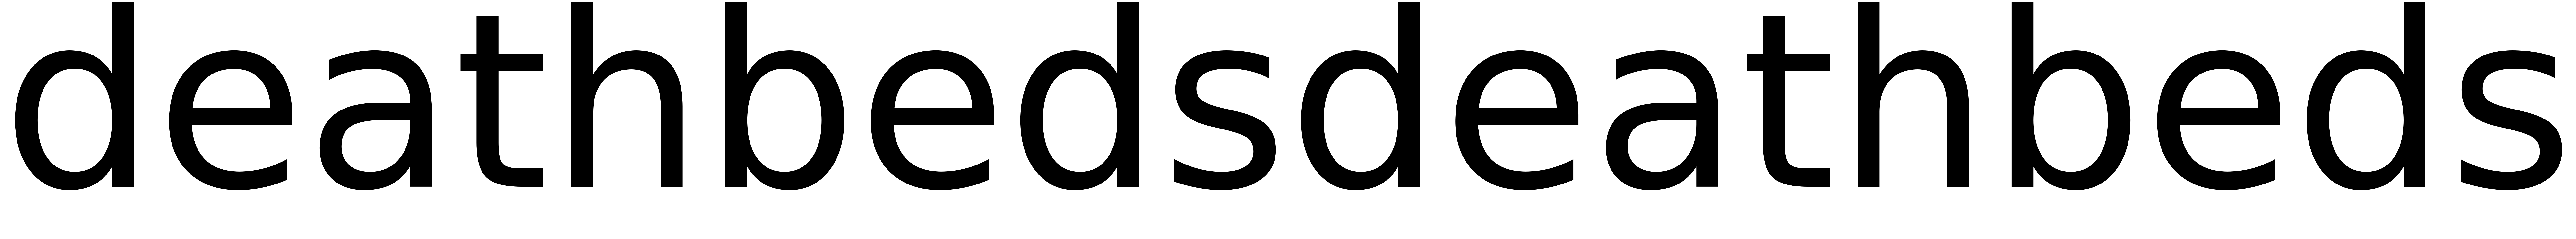

In [3]:
    
    matplotlib.pyplot.text(0, 0, "deathbeds"*2, fontsize=1000)
    matplotlib.pyplot.axis("off")
    fig = matplotlib.pyplot.gcf()
    data= io.BytesIO()
    fig.savefig(data, bbox_inches="tight")
    data.seek(0)
    im = numpy.where(matplotlib.pyplot.imread(data).sum(2)[::-4, ::10] < 2)
    data.seek(0)
    im = pandas.concat(
        [pandas.Series(im[0], name="x"), pandas.Series(im[1], name="y")], axis=1
    )

parameterize x onto 0..1 and s one 0..2π

In [4]:
    text = im.set_index("x")
    extent = text.index.max() - text.index.min()
    text["t"] = text.index.to_series()
    text.t = text.t.sub(text.t.min()).div(extent)
    extent = text.y.max() - text.y.min()
    text["s"] = text.y.add(text.y.min()).div(extent).mul(2*numpy.pi)

move the parameterization in xyz space.

In [5]:
    R = 50
    df = pandas.concat([text.s,text.t], axis=1)
    df = df.assign(
        x=(R+text.t*text.s.div(2).apply(numpy.cos))*text.s.apply(numpy.cos), 
        y=(R+text.t*text.s.div(2).apply(numpy.cos))*text.s.apply(numpy.sin), 
        z=text.t.mul(text.s.div(2).apply(numpy.sin)), 
    )

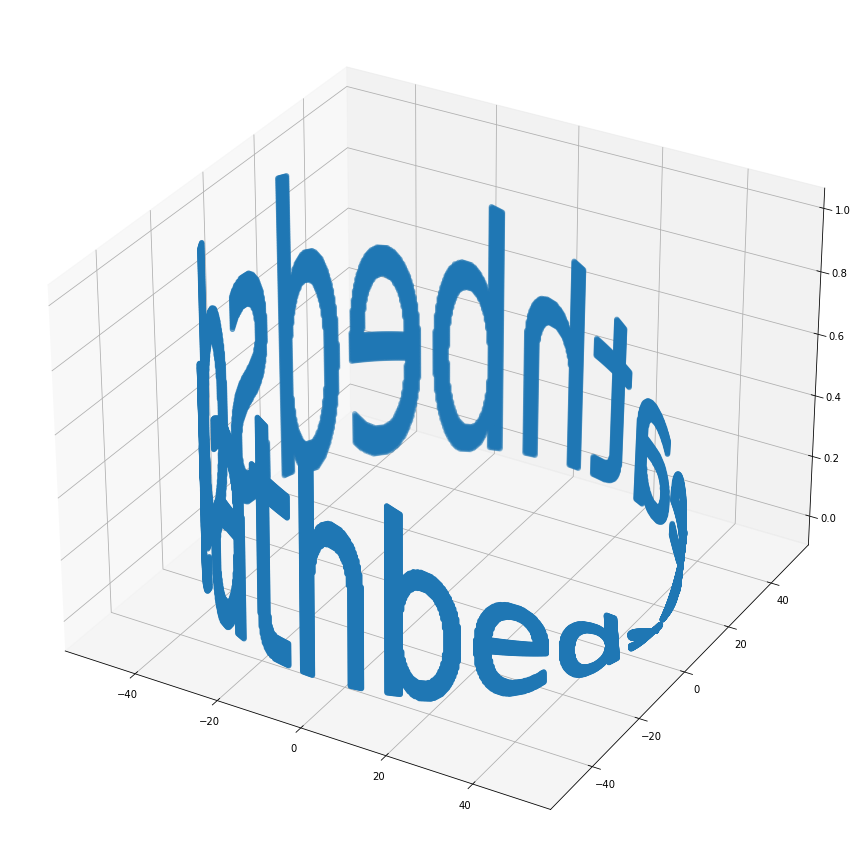

In [6]:
    %matplotlib ipympl

    fig = matplotlib.pyplot.gcf()
    ax = Axes3D(fig, auto_add_to_figure=False)
    fig.add_axes(ax)
    ax.scatter3D(df.x, df.y, df.z)
    matplotlib.pyplot.gcf().set_size_inches((12,12))